In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load Dataset

In [3]:
df = pd.read_csv('../Datasets/train-balanced-sarcasm.csv')
world_news = df[df['subreddit'] == 'worldnews']
world_news.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
130,0,all of which is irrelevant to whether or not A...,Bernie_CombswBalloon,worldnews,1,-1,-1,2016-12,2016-12-01 16:50:16,I agree that his imprisonment is self imposed ...
238,0,"The fact we are arming ""rebels"" linked to AQ i...",CareToRemember,worldnews,-1,-1,-1,2016-12,2016-12-30 14:43:05,"Thank you Putin, for showing the level-headed ..."
251,0,Whilst knowing that what they were doing was i...,xNicolex,worldnews,1,1,0,2016-09,2016-09-05 11:10:45,Apple paid the taxes that Ireland required.
263,0,"If she's already agreed to step down, isn't th...",HugePurpleNipples,worldnews,2,-1,-1,2016-12,2016-12-03 16:59:43,South Korea opposition introduces bill to impe...
525,0,Were those who boycotted South Africa and only...,stainorstreak,worldnews,1,-1,-1,2016-11,2016-11-02 18:23:29,"if someone boycotted every muslim nation, and ..."


In [ ]:
world_news.tail()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1010738,0,I foresee a thread laced with puns,niels_olson,worldnews,4,4,0,2009-01,2009-01-29 19:42:09,All we need now is the europeans to push the i...
1010754,1,looks like a reasonably unbiased and trustwort...,sleepingorange,worldnews,-2,-2,0,2009-04,2009-04-02 17:32:35,The Israeli army kidnaps 27 Palestinian civili...
1010794,1,butbutbut racism ethnic discrimination cultura...,gnyffel,worldnews,107,107,0,2009-07,2009-07-23 19:52:55,Tell me again why we don't fucking vet people ...
1010801,1,"Yes, and there's no such thing as mental illne...",Davin900,worldnews,-1,-1,0,2009-08,2009-08-14 18:34:29,And my parents had a rough upbringing/backgrou...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [ ]:
world_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26377 entries, 130 to 1010824
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           26377 non-null  int64 
 1   comment         26375 non-null  object
 2   author          26377 non-null  object
 3   subreddit       26377 non-null  object
 4   score           26377 non-null  int64 
 5   ups             26377 non-null  int64 
 6   downs           26377 non-null  int64 
 7   date            26377 non-null  object
 8   created_utc     26377 non-null  object
 9   parent_comment  26377 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.2+ MB


In [ ]:
# check for any NaN values
world_news.isna().sum()

,0
label,0
comment,2
author,0
subreddit,0
score,0
ups,0
downs,0
date,0
created_utc,0
parent_comment,0


In [ ]:
# remove NA from world news df
world_news = world_news.dropna()

In [ ]:
world_news.isna().sum()

,0
label,0
comment,0
author,0
subreddit,0
score,0
ups,0
downs,0
date,0
created_utc,0
parent_comment,0


In [ ]:
world_news.describe()

,label,score,ups,downs
count,26375.000000,26375.000000,26375.00000,26375.000000
mean,0.642540,7.081706,5.30036,-0.099223
std,0.479261,85.111915,36.52076,0.298967
min,0.000000,-172.000000,-172.00000,-1.000000
25%,0.000000,1.000000,0.00000,0.000000
50%,1.000000,1.000000,1.00000,0.000000
75%,1.000000,4.000000,3.00000,0.000000
max,1.000000,9070.000000,2354.00000,0.000000


In [ ]:
world_news.shape

(26375, 10)

# EDA for Categorical Variables
## label, comment, author, subreddit, date, parent_comment


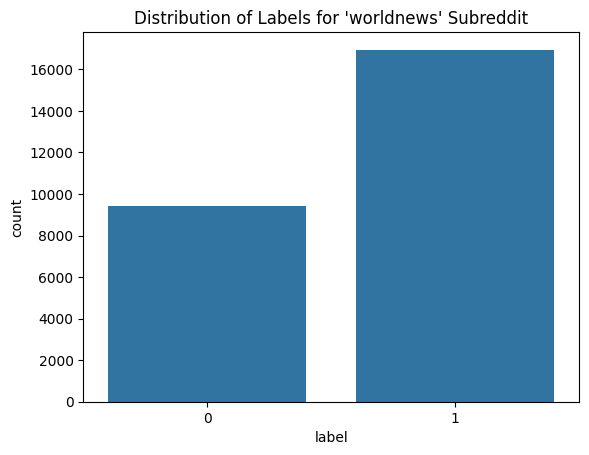

In [ ]:
sns.countplot(x='label', data=world_news)
plt.title("Distribution of Labels for 'worldnews' Subreddit")
plt.show()

In [ ]:
def get_top_words(df, column_name, num_words):
  count_vectorizer = CountVectorizer(stop_words='english')
  word_count = count_vectorizer.fit_transform(df[column_name])

  word_sum = word_count.sum(axis=0)

  frequency = []
  for word, index in count_vectorizer.vocabulary_.items():
    frequency.append((word, word_sum[0, index]))

  frequency = sorted(frequency, key=lambda x: x[1], reverse=True)
  return frequency

In [ ]:
# Top 10 frequently used words from comments
print(get_top_words(world_news, 'comment', 10))

[('just', 1732), ('people', 1608), ('yeah', 1538), ('like', 1413), ('don', 1055), ('right', 928), ('sure', 871), ('yes', 841), ('good', 705), ('know', 660), ('world', 572), ('think', 544), ('israel', 466), ('country', 456), ('really', 455), ('time', 443), ('oh', 443), ('make', 433), ('way', 429), ('thing', 421), ('need', 418), ('let', 404), ('better', 399), ('going', 395), ('russia', 377), ('war', 375), ('government', 373), ('doesn', 371), ('want', 362), ('did', 357), ('didn', 356), ('forgot', 343), ('great', 330), ('totally', 329), ('isn', 318), ('bad', 308), ('say', 303), ('ll', 303), ('obviously', 299), ('shit', 297), ('isis', 294), ('money', 293), ('america', 285), ('maybe', 283), ('muslims', 281), ('does', 276), ('mean', 275), ('man', 269), ('thought', 269), ('wrong', 266), ('clearly', 257), ('years', 257), ('news', 255), ('racist', 250), ('fuck', 248), ('stop', 247), ('american', 246), ('doing', 242), ('countries', 239), ('reddit', 237), ('ve', 236), ('probably', 236), ('guys', 2

In [ ]:
# Top 10 frequently used words from parent_comment
print(get_top_words(world_news, 'parent_comment', 10))

[('people', 3386), ('just', 2446), ('like', 2187), ('don', 1806), ('world', 1245), ('think', 1165), ('country', 1081), ('israel', 1065), ('russia', 981), ('right', 947), ('know', 940), ('government', 918), ('war', 878), ('time', 872), ('want', 866), ('going', 849), ('say', 791), ('years', 779), ('isis', 779), ('make', 766), ('really', 762), ('way', 759), ('good', 750), ('did', 652), ('says', 648), ('new', 647), ('shit', 641), ('does', 621), ('china', 621), ('thing', 616), ('need', 596), ('state', 586), ('actually', 568), ('doesn', 560), ('countries', 550), ('year', 548), ('said', 544), ('money', 534), ('fuck', 533), ('sure', 525), ('russian', 525), ('isn', 519), ('police', 497), ('women', 491), ('military', 488), ('let', 464), ('ve', 462), ('things', 454), ('killed', 446), ('muslim', 444), ('man', 443), ('saudi', 440), ('muslims', 440), ('fucking', 439), ('american', 437), ('work', 435), ('news', 433), ('bad', 426), ('pretty', 421), ('obama', 420), ('stop', 414), ('better', 411), ('000

In [ ]:
def plot_bar_chart(df, column, top_n, title):
  top_categories = df[column].value_counts().head(top_n)
  top_categories.plot(kind='barh', title=title)
  print(top_categories)
  plt.show()

author
mad-n-fla              135
critfist                55
moushoo                 53
vancooldude             51
sovietskaya             51
KnotPtelling            41
Logitech0               40
Chaoslab                37
bracciofortebraccio     35
Puffin_fan              35
Name: count, dtype: int64


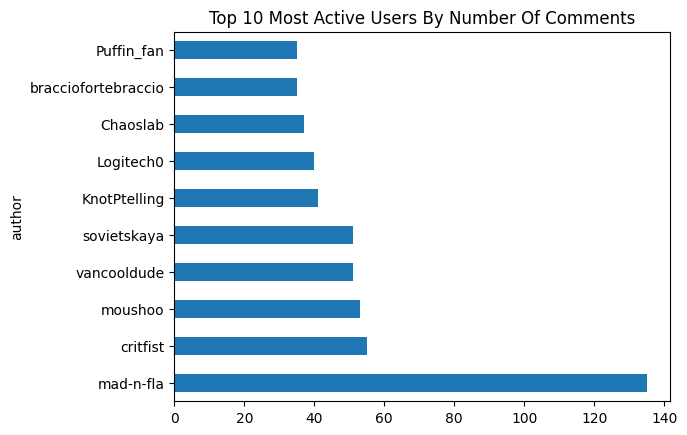

In [ ]:
plot_bar_chart(world_news, 'author', 10, 'Top 10 Most Active Users By Number Of Comments')

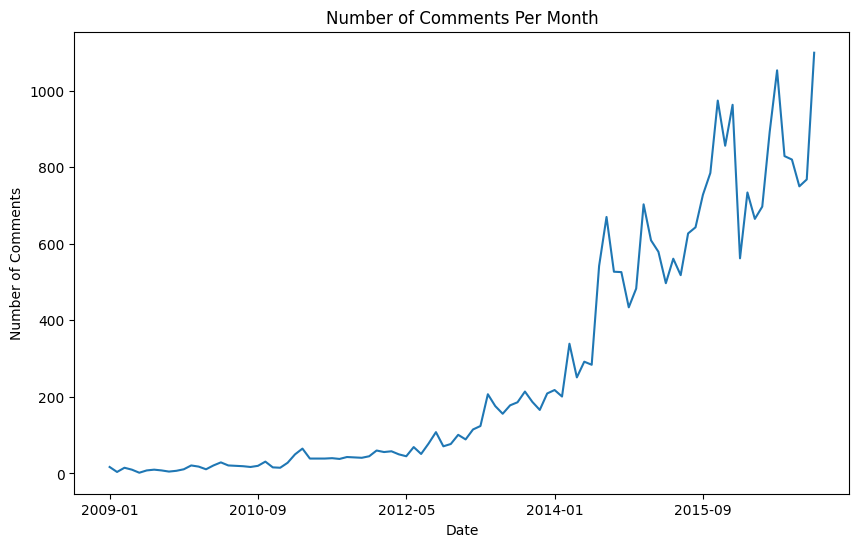

In [ ]:
# convert to date time
world_news['date_column'] = pd.to_datetime(world_news['date'], format='%Y-%m')

# count the number of comments per month
monthly_counts = world_news.groupby('date').size()

# plot the time series
plt.figure(figsize=(10,6))
monthly_counts.plot(kind='line')
plt.title('Number of Comments Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

# EDA for Numerical Variables
## scores, ups, downs

In [ ]:
def box_plot(df, column, title):
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])

  plt.title(title)
  plt.ylabel('Values')

In [ ]:
def histogram(df, column, title, bins):
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=bins, edgecolor='black')

  plt.title(title)
  plt.xlabel('Values')
  plt.ylabel('Frequency')

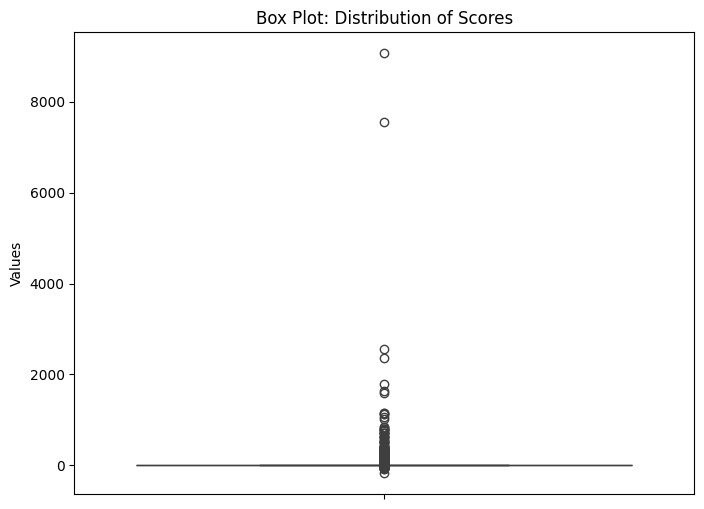

In [ ]:
box_plot(world_news, 'score', 'Box Plot: Distribution of Scores')
# Shows negative scores

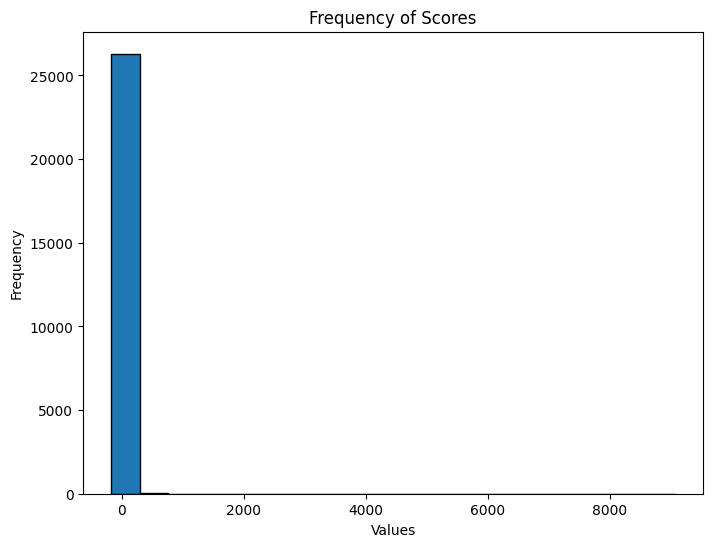

In [ ]:
histogram(world_news, 'score', 'Frequency of Scores', 20)

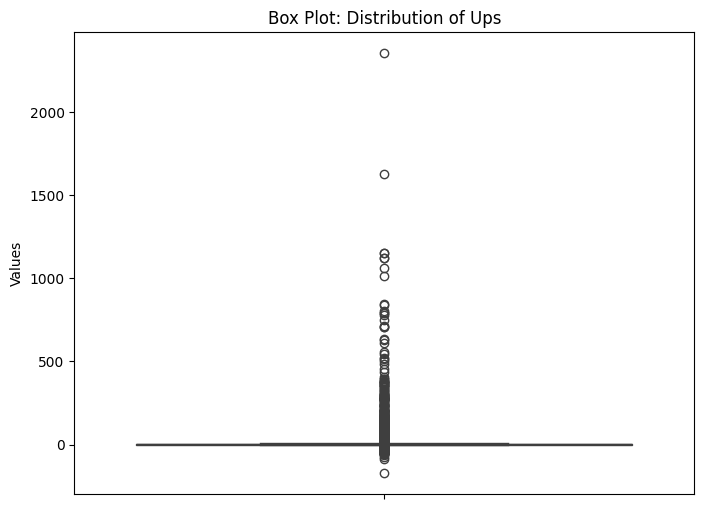

In [ ]:
box_plot(world_news, 'ups', 'Box Plot: Distribution of Ups')

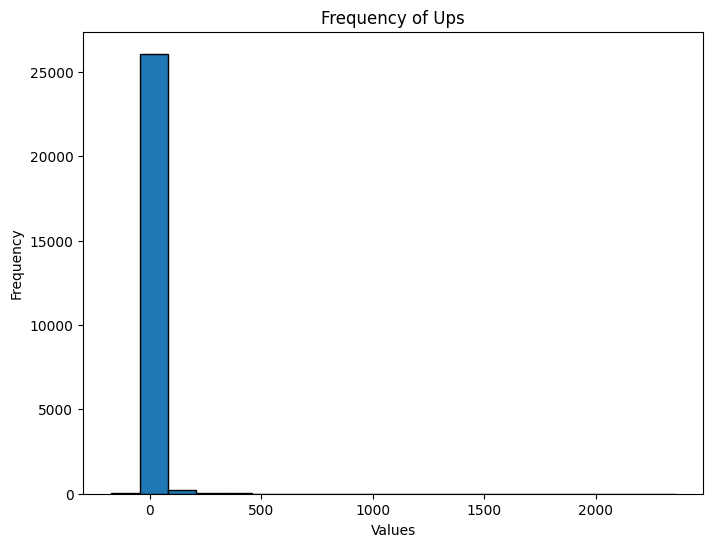

In [ ]:
histogram(world_news, 'ups', 'Frequency of Ups', 20)

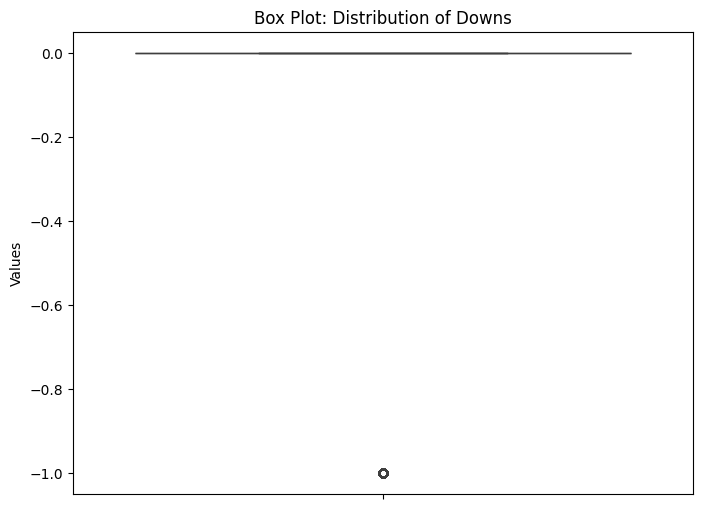

In [ ]:
box_plot(world_news, 'downs', 'Box Plot: Distribution of Downs')

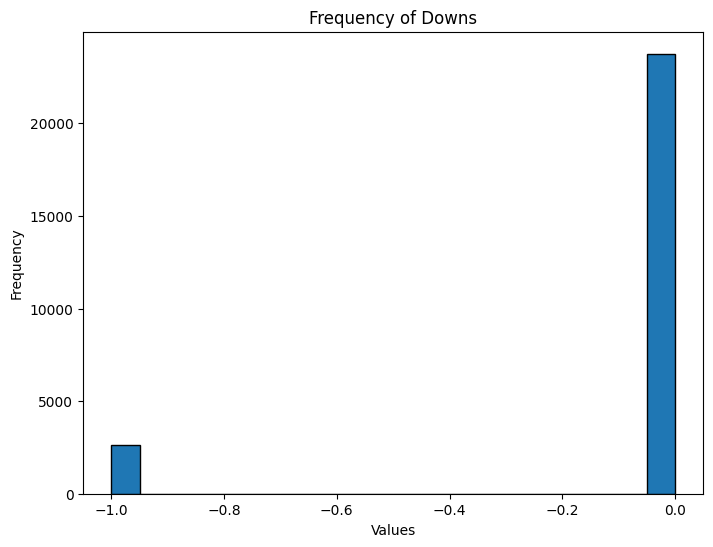

In [ ]:
histogram(world_news, 'downs', 'Frequency of Downs', 20)

<function matplotlib.pyplot.show(close=None, block=None)>

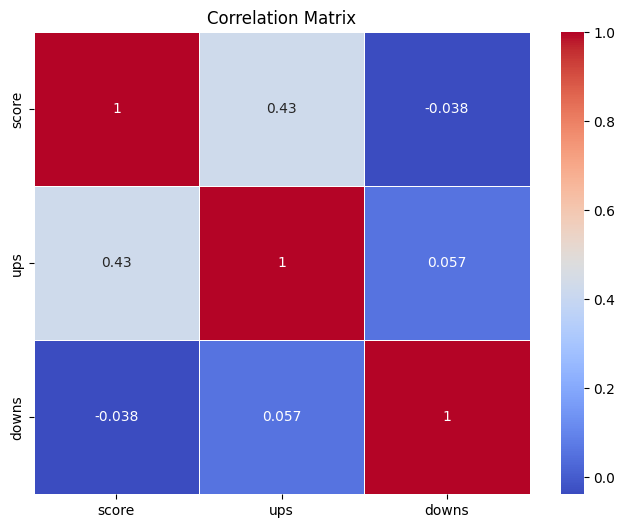

In [ ]:
# Plot correlation matrix

df_numeric = world_news[['score', 'ups', 'downs']]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show